1\. Write a function that converts number representation (bin<->dec<->hex)

In [166]:
#only for positive integers

def bintodec(input):
    pos= [int(x) for x in input[2:]]
    pos= pos[::-1] #reversing the order
    temp=0 
    for i in range(len(pos)): temp+=2**i * pos[i]
    return temp

def dectobin(dec, temp=[]): 
    if (dec<=1):
        temp.insert(0,str(dec%2))
        out="".join(temp)
        return "0b"+out
    temp.insert(0, str(dec%2))
    return dectobin(dec//2, temp)
    
def hextodec(input):
    rule="0123456789abcdef"
    pos = [x for x in input[2:]]
    pos= pos[::-1] 
    temp=0
    for i in range(len(pos)):
        temp += 16**i*rule.index(pos[i])
    return temp 

def dectohex(input, temp=[]):
    rule="0123456789abcdef"
    if(input<16):
        temp.insert(0,rule[input%16])
        out=''.join(temp)
        return '0x'+out
    temp.insert(0,rule[input%16])
    return dectohex(input//16, temp)
  

def converter(x):
    intype=type(x)

    if intype==int:
        print("Binary conversion: ", dectobin(x,[]))
        print("Hexadecimal Conversion: ", dectohex(x,[]))

    if intype== str and (x[1]=='b') == True:
        print("Decimal Conversion: ", bintodec(x))
        print("Hexadecimal Conversion: ", dectohex(bintodec(x)))
        
    if intype== str and (x[1]=='x') == True:
        print("Decimal Conversion: ", hextodec(x))
        print("Binary Conversion: ", dectobin(hextodec(x)))



2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [119]:
def word_to_float(word):
    s=int(word[0])
    e=int(word[1:9],2)
    m=word[9:]
    m=m[::-1] #inverting order
    bias = 127
    f=1
    for x in enumerate(m,1):
        f+=int(x[1])*2**(-x[0])
    return  (-1)**s*(f)*2**(e-bias)

3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [122]:
old=1.
new=1.
tracker=[old, new]
condition=False
while condition==False:
    tracker[0]=tracker[1]
    tracker[1]/=2
    if tracker[1]==0:
        condition=True
        print("underflow at:", tracker[0])

underflow at: 5e-324


In [175]:
old=1.
new=1.
tracker=[old, new]
condition=False
while condition==False:
    tracker[0]=tracker[1]
    tracker[1]*=2
    if tracker[1]==float("inf"):
        condition=True
        print("overflow at:", tracker[0])

overflow at: 8.98846567431158e+307


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [211]:

tracker=[0, 0]
condition=False
i=1
while condition==False:
    tracker[0]=tracker[1]
    tracker[1]+=2**(-i)
    if tracker[1]==tracker[0]:
        condition=True
        imax= i-1
        print("machine precision:", 2**(-imax))
    i+=1


machine precision: 5.551115123125783e-17


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [212]:
import numpy as np

def quadratic(a,b,c):
    rad=np.sqrt(b**2-4*a*c)
    return [(-b+rad)/(2*a),(-b-rad)/(2*a)]

def rewriting_quadratic(a,b,c):
    rad=np.sqrt(b**2-4*a*c)
    return [2*c/(-b - rad), 2*c/(-b + rad)]

def accurate_solution(a,b,c):
    xplus = (-b-np.sign(b)*np.sqrt(b**2-4*a*c))/(2*a)
    xminus = c / (a * xplus)
    return [xminus, xplus]


#a
print(quadratic(0.001, 1000, 0.001))
#b
print(rewriting_quadratic(0.001, 1000, 0.001))
#c
print(accurate_solution(0.001, 1000, 0.001))

#It's due to the fact subtracting very big numbers to very small ones always leads to problems.
#We have to avoid subtractions and when possible use sums.

[-9.999894245993346e-07, -999999.999999]
[-1.000000000001e-06, -1000010.5755125057]
[-1.000000000001e-06, -999999.999999]


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

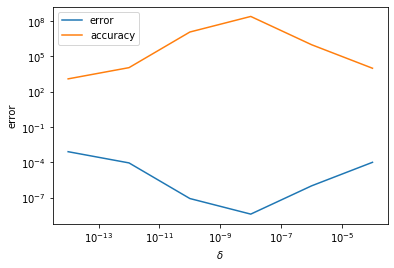

In [250]:
#a
delta= 1e-2
def fun(x): return x*(x-1)
def incremental_ratio(x0, delta): return (fun(x0+delta)-fun(x0))/delta
incremental_ratio(1, delta)
#b
deltas=[1e-4, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14]
derivatives=[]
error=[]
fprime=1#real value of the derivative
for delta in enumerate(deltas):
    derivatives.append(incremental_ratio(1, delta[1])) 
    error.append(np.abs(fprime-derivatives[delta[0]]))


error=np.array(error)
accuracy= 1/error

import matplotlib.pyplot as plt
plt.plot(deltas, error, label="error")
plt.plot(deltas, accuracy, label="accuracy")

plt.yscale('log')
plt.ylabel('error')
plt.xscale('log')
plt.xlabel('$\delta$')
plt.legend()

#Accuracy increase exponentially with delta until it reaches it's maximum at delta=1e-8 and starts to decrease exponentially

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [7]:
import numpy as np


def integrator(f, N, a, b):
    h = np.abs(b-a)/N
    y = [f(x) for x in np.linspace(a, b, N)]
    return sum(y)*h

def f(x):return np.sqrt(1-x**2)

int= integrator(f, N=100, a=-1, b=1)
#print('accuracy: ',
int

1.553417929404895

In [32]:
#to find what N corresponds to 1 second we could fit it from the next cell
#another option is to do it manually:
import time
int_slices=range(2*10**5, 3*10**5, 1000)
for N in int_slices:
    start = time.time()
    int.append(integrator(f, N, a=-1, b=1))
    stop = time.time()
    if stop-start>1: 
        N_1s=Nprev
        break
    Nprev=N
print("max N to reach 1s=", N_1s,"\pm 1000")

max N to reach 1s= 211300 \pm 1000


Text(0.5, 0, 'N')

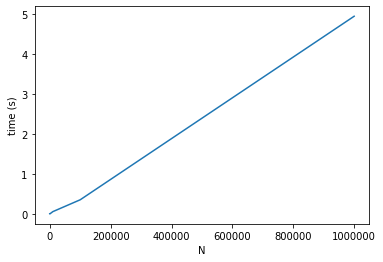

In [28]:
int=[]
T=[]

int_slices=[10**i for i in range(1,7)]
for N in int_slices:
    start = time.time()
    int.append(integrator(f, N, a=-1, b=1))
    stop = time.time()
    T.append(stop-start)
    
import matplotlib.pyplot as plt 

plt.plot(int_slices,T)
plt.ylabel('time (s)')
plt.xlabel('N')

Text(0.5, 0, 'N')

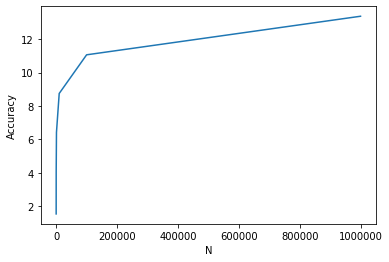

In [24]:
plt.plot(int_slices,np.log(1/np.abs(np.array(int)-np.pi/2)))
plt.ylabel('Accuracy')
plt.xlabel('N')

#there wouldn't be much of a benefit in running the code for one minute,
#since after 4s accuracy is almost saturated.